In [33]:
import numpy as np
import matplotlib.pyplot as plt
import math
from astropy.io import fits
import glob
plt.rcParams['image.origin'] ='lower'

In [34]:
files = glob.glob('/Users/blewis/Desktop/grad-school/Research/GPI-disks/20190427_H_Pol-TME/*mJy*.fits')
print(files)

['/Users/blewis/Desktop/grad-school/Research/GPI-disks/20190427_H_Pol-TME/S20190427S0339_podc_distorcorr_rstokesdc_sm2_stpol13-15_quadsub_mJy_arcsec-2.fits', '/Users/blewis/Desktop/grad-school/Research/GPI-disks/20190427_H_Pol-TME/S20190427S0339_podc_distorcorr_rstokesdc_sm1_stpol13-15_quadsub_mJy_arcsec-2.fits', '/Users/blewis/Desktop/grad-school/Research/GPI-disks/20190427_H_Pol-TME/S20190427S0339_podc_distorcorr_rstokesdc_sm0_stpol13-15_quadsub_mJy_arcsec-2.fits']


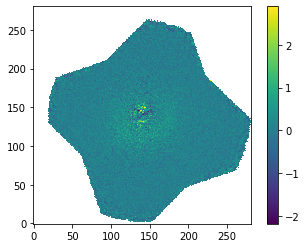

In [35]:
import matplotlib.patches as mpatches
data = fits.getdata('/Users/blewis/Desktop/grad-school/Research/GPI-disks/20190427_H_Pol-TME/S20190427S0339_podc_distorcorr_rstokesdc_sm0_stpol13-15_quadsub_mJy_arcsec-2.fits')
I = data[0,:,:]
Q = data[1,:,:]
plt.imshow(Q)
plt.colorbar()
plt.show()

### Symmetry Tests

In [36]:
Q[np.isnan(Q)]=0
import scipy.ndimage
Qr = scipy.ndimage.rotate(Q,angle=12,reshape=False)
image = Qr
q1 = image[142:,3:142]
q2 = image[142:,142:]
q3 = image[0:142,142:]
q4 = image[0:142,3:142]

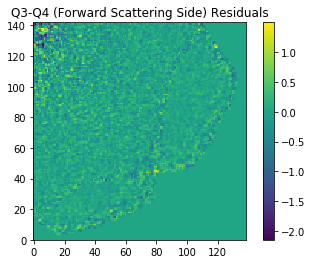

In [37]:
##forward scattering side
plt.imshow(np.fliplr(np.fliplr(q3)-q4))
plt.ylim(0,142)
plt.colorbar()
plt.title('Q3-Q4 (Forward Scattering Side) Residuals')
plt.savefig('../plots/forward-scatt-residuals.png')
plt.show()

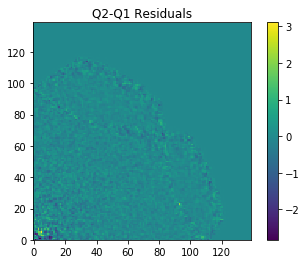

In [38]:
#back scattering side
plt.imshow(q2-np.fliplr(q1))
plt.ylim(0,len(q2))
plt.title('Q2-Q1 Residuals')
plt.colorbar()
plt.savefig('../plots/back-scatt-residuals.png')
plt.show()

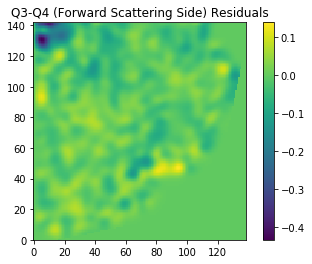

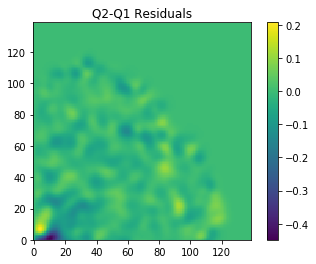

In [39]:
##try on smoothed data
Q_sm = scipy.ndimage.gaussian_filter(Q, sigma=(3, 3), order=0)
Qr = scipy.ndimage.rotate(Q_sm,angle=12,reshape=False)
image = Qr
q1 = image[142:,3:142]
q2 = image[142:,142:]
q3 = image[0:142,142:]
q4 = image[0:142,3:142]

##forward scattering side
plt.imshow(np.fliplr(np.fliplr(q3)-q4))
plt.ylim(0,142)
plt.colorbar()
plt.title('Q3-Q4 (Forward Scattering Side) Residuals')
plt.savefig('../plots/forward-scatt-residuals_sm.png')
plt.show()

#back scattering side
plt.imshow(q2-np.fliplr(q1))
plt.ylim(0,len(q2))
plt.title('Q2-Q1 Residuals')
plt.colorbar()
plt.savefig('../plots/back-scatt-residuals_sm.png')
plt.show()

### Making a plot of position angle

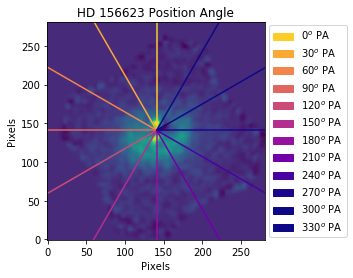

In [42]:
from matplotlib import collections

#remaking angle plot but for PA

plt.imshow(Q_sm)
plt.xlabel('Pixels')
plt.ylabel('Pixels')
plt.title('HD 156623 Position Angle')

line_list=[]
cmap = plt.cm.get_cmap('plasma_r')
colors=[]
labels=[]
i=1
thetas = [90,120,150,180,210,240,270,300,330,0,30,60]
for angle in thetas:
    x0 = 141
    y0 = 141
    x1 = (300*np.sin(np.deg2rad(angle)+(np.pi/2)))+141
    #print(x1)
    y1 = (300*np.cos(-np.deg2rad(angle)+(np.pi/2)))+141
    coords = [(x0,y0),(x1,y1)]
    line_list.append(coords)
    colors.append(cmap(i*25))
    labels.append('{}$^o$ PA'.format(angle-90 if angle-90>=0 else 360+(angle-90)))
    i=i+1
    
import matplotlib.patches as mpatches
handles=[]
for p in range(len(colors)):
    patch = mpatches.Patch(color=colors[p], label=labels[p])
    handles.append(patch)

collection_1_2=collections.LineCollection(line_list, color=colors)
ax = plt.gca()
ax.add_collection(collection_1_2)
plt.legend(handles=handles,loc='center right', bbox_to_anchor=[1.4,0.5])
plt.savefig('../plots/hd156623-legend_PA.png')
plt.show()

## Polarization Fraction

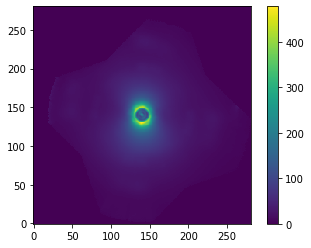

477.9787 0.0


In [49]:
#taking a look at total intensity
I[np.isnan(I)]=0
plt.imshow(I)
plt.colorbar()
plt.show()
print(np.max(I),np.min(I))

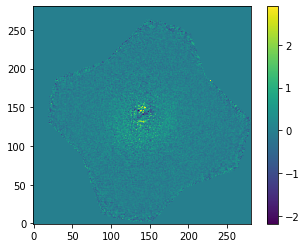

2.8995767 -2.1881762


In [50]:
#taking a look at pol intensity
Q[np.isnan(Q)]=0
plt.imshow(Q)
plt.colorbar()
plt.show()
print(np.max(Q),np.min(Q))

/Users/blewis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


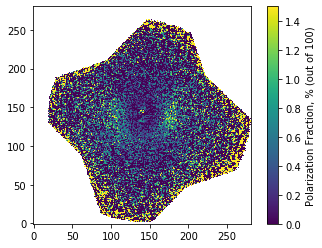

In [71]:
plt.imshow((Q/I)*100,vmax=1.5,vmin=0)
plt.colorbar(label='Polarization Fraction, % (out of 100)')
plt.savefig('../plots/pol_fraction.png',dpi=300)